#Подгружаем библиотеки и данные (Спасибо Полине)

In [ ]:

import numpy as np
from scipy.stats import multivariate_normal as mvn
import copy
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import PIL
import torch.nn.functional as F
import torch 
import torchvision.transforms as T 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

train = pd.read_csv('train.csv')

train_not_empl=train.drop(columns=['Name', 'Cabin', 'PassengerId', 'Ticket'])
train_empl=train.drop(columns=['Name', 'Cabin', 'PassengerId', 'Ticket'],inplace=True)

train['Age'].fillna(np.mean(train['Age']), inplace=True)
train['Embarked'].fillna(('S'), inplace=True)


display(train)

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

#for col in ['Sex', 'Pclass', 'SibSp', 'Embarked']:
for col in ['Sex']:
    train_encoded = pd.DataFrame(encoder.fit_transform(train[[col]]))
    train_encoded.columns = encoder.get_feature_names([col])
    train.drop([col], axis=1, inplace=True)
    train = pd.concat([train, train_encoded], axis=1)

train = train.drop(columns=['Pclass', 'SibSp', 'Embarked'])

display(train)

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['Survived']), train['Survived'], test_size=0.33, shuffle=False)     
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=['Survived']), train['Survived'], test_size=0.33, shuffle=False)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Survived,Age,Parch,Fare,Sex_female,Sex_male
0,0,22.000000,0,7.2500,0.0,1.0
1,1,38.000000,0,71.2833,1.0,0.0
2,1,26.000000,0,7.9250,1.0,0.0
3,1,35.000000,0,53.1000,1.0,0.0
4,0,35.000000,0,8.0500,0.0,1.0
...,...,...,...,...,...,...
886,0,27.000000,0,13.0000,0.0,1.0
887,1,19.000000,0,30.0000,1.0,0.0
888,0,29.699118,2,23.4500,1.0,0.0
889,1,26.000000,0,30.0000,0.0,1.0


# Реализуем обычную линейную нейронку под титаник
# 3 линейных слоя с сигмойдой


In [ ]:
class TitanicSimpleNNModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(5, 7)
        self.sigmoid1 = nn.Sigmoid()
        self.linear2 = nn.Linear(7, 7)
        self.sigmoid2 = nn.Sigmoid()
        self.linear3 = nn.Linear(7, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        lin1_out = self.linear1(x)
        sigmoid_out1 = self.sigmoid1(lin1_out)
        sigmoid_out2 = self.sigmoid2(self.linear2(sigmoid_out1))
        return self.softmax(self.linear3(sigmoid_out2))

In [ ]:
net = TitanicSimpleNNModel()

In [ ]:

criterion = nn.CrossEntropyLoss()
num_epochs = 2000

optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
input_tensor = X_train.type(torch.FloatTensor)
label_tensor = y_train
for epoch in range(num_epochs):    
  output = net(input_tensor)
  loss = criterion(output, label_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch % 20 == 0:
      print ('Epoch {}/{} => Loss: {:.2f}'.format(epoch+1, num_epochs, loss.item()))


Epoch 1/2000 => Loss: 0.69
Epoch 21/2000 => Loss: 0.68
Epoch 41/2000 => Loss: 0.67
Epoch 61/2000 => Loss: 0.67
Epoch 81/2000 => Loss: 0.67
Epoch 101/2000 => Loss: 0.66
Epoch 121/2000 => Loss: 0.66
Epoch 141/2000 => Loss: 0.66
Epoch 161/2000 => Loss: 0.66
Epoch 181/2000 => Loss: 0.65
Epoch 201/2000 => Loss: 0.65
Epoch 221/2000 => Loss: 0.65
Epoch 241/2000 => Loss: 0.64
Epoch 261/2000 => Loss: 0.64
Epoch 281/2000 => Loss: 0.64
Epoch 301/2000 => Loss: 0.63
Epoch 321/2000 => Loss: 0.63
Epoch 341/2000 => Loss: 0.62
Epoch 361/2000 => Loss: 0.61
Epoch 381/2000 => Loss: 0.61
Epoch 401/2000 => Loss: 0.60
Epoch 421/2000 => Loss: 0.59
Epoch 441/2000 => Loss: 0.58
Epoch 461/2000 => Loss: 0.57
Epoch 481/2000 => Loss: 0.57
Epoch 501/2000 => Loss: 0.56
Epoch 521/2000 => Loss: 0.55
Epoch 541/2000 => Loss: 0.55
Epoch 561/2000 => Loss: 0.55
Epoch 581/2000 => Loss: 0.54
Epoch 601/2000 => Loss: 0.54
Epoch 621/2000 => Loss: 0.54
Epoch 641/2000 => Loss: 0.53
Epoch 661/2000 => Loss: 0.53
Epoch 681/2000 => Lo

In [ ]:
out_probs = net(input_tensor).detach().numpy()
out_classes = np.argmax(out_probs, axis=1)
print("Train Accuracy:", sum(out_classes == y_train.numpy()) / len(y_train))

Train Accuracy: 0.8053691275167785


# Еще один вариант реализации ( МОЖНО СКИПАТЬ)

In [ ]:
class TitanNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(TitanNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(5, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 2)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
titan_net = TitanNet(10)
titan_net2 = TitanNet(4)

In [ ]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(titan_net2.parameters(), 
                             lr=1.0e-3)
np.random.permutation(10)

array([4, 6, 7, 8, 3, 2, 9, 0, 1, 5])

In [ ]:
X_train=torch.tensor(X_train.to_numpy().astype(np.float32))
y_train=torch.tensor(y_train.to_numpy().astype(np.uint8))
X_test=torch.tensor(X_test.to_numpy().astype(np.float32))
y_test=torch.tensor(y_test.to_numpy().astype(np.uint8))

In [ ]:
batch_size = 50

test_accuracy_history = []
test_loss_history = []
for epoch in range(2000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
      
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
    test_preds = titan_net2.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
print(accuracy)
    

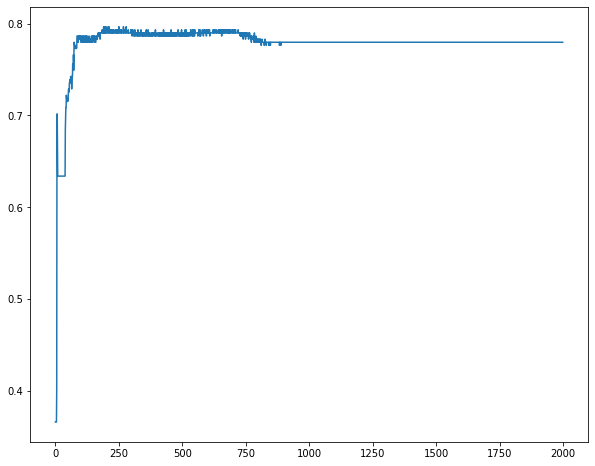

In [ ]:
plt.plot(test_accuracy_history)

# Реализация нейронки через Conv1d

In [ ]:
class TitanNet_Conv(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(TitanNet_Conv, self).__init__()
        
        self.fc1 = torch.nn.Conv1d(5,n_hidden_neurons,1)
        self.activ1 = torch.nn.ReLU()
        
        self.fc2 = torch.nn.Conv1d(n_hidden_neurons,6,1)
        self.activ2 = torch.nn.ReLU()   
        self.fc3 = torch.nn.Conv1d(6,n_hidden_neurons,1)
        self.activ3 = torch.nn.ReLU()
        self.fc4 = torch.nn.Conv1d(n_hidden_neurons,n_hidden_neurons,1)
        self.activ4 = torch.nn.ReLU()
        self.fc5 = torch.nn.Conv1d(n_hidden_neurons,3,1)
        self.activ5 = torch.nn.ReLU()

        self.fc6 = torch.nn.Linear(3, 2)
        
    def forward(self, x):

        x = self.fc1(x)
        x = self.activ1(x)
        
        x = self.fc2(x)
        x = self.activ2(x)
        x = self.fc3(x)
        x = self.activ3(x)
        x = self.fc4(x)
        x = self.activ4(x)
        x = self.fc5(x)
        x = self.activ5(x)
        x = x.view(x.size(0), x.size(1) * x.size(2))
        
        
        x = self.fc6(x)
  
        return x

    def inference(self, x):
        x = self.forward(x)
        
        return x
    
titan_net_conv = TitanNet_Conv(4)

DF to Tensor

In [ ]:
X_train=torch.tensor(X_train.to_numpy().astype(np.float32))
y_train=torch.tensor(y_train.to_numpy().astype(np.uint8))
X_test=torch.tensor(X_test.to_numpy().astype(np.float32))
y_test=torch.tensor(y_test.to_numpy().astype(np.uint8))

In [ ]:
X_test.shape

torch.Size([295, 5])

1.   50 батчей
2.   2000 эпох
3.   loss функция - CrossEntropyLoss
4.   lr = 0.0001






In [ ]:
batch_size = 50
loss = torch.nn.CrossEntropyLoss()
test_accuracy_history = []
test_loss_history = []
for epoch in range(2000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer = torch.optim.Adam(titan_net_conv.parameters(), lr=0.0001)
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]

        preds = titan_net_conv.forward(x_batch) 
  
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
    test_preds = titan_net_conv.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)
    

tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.3661)
tensor(0.7390)
tensor(0.7424)
tensor(0.7390)
tensor(0.7356)
tensor(0.7390)
tensor(0.7356)
tensor(0.7322)
tensor(0.7322)
tensor(0.7220)
tensor(0.7186)
tensor(0.7186)
tensor(0.7153)
tensor(0.7153)
tensor(0.7153)
tensor(0.7153)
tensor(0.7153)
tensor(0.7153)
tensor(0.7186)
tensor(0.7186)
tensor(0.7153)
tensor(0.7119)
tensor(0.7085)
tensor(0.7085)
tensor(0.7119)
tensor(0.6983)
tensor(0.7051)
tensor(0.7051)
tensor(0.7051)
tensor(0.7085)
tensor(0.7085)
tensor(0.7085)
tensor(0.7085)
tensor(0.7

In [ ]:
X_test.shape
X_train.shape

(596, 5)

#Графики


График accuracy на 3 слоях


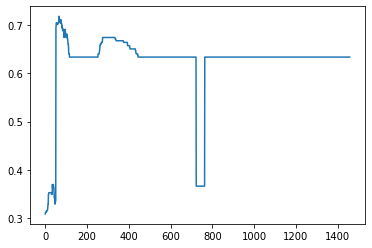

In [ ]:
plt.plot(test_accuracy_history)


График accuracy на 6 слоях


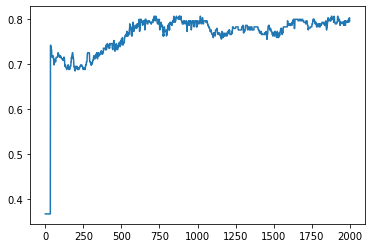

In [ ]:
plt.plot(test_accuracy_history)